In [1]:
from allthethings import PyNetwork
from allthethings import PyBC_opt_dh
import numpy as np
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
fi = "indata/3pipes1.inp"     #location of .inp file
fc = "indata/3pipes1.config"  #location of .config file
#fi = "indata/3pipesL1.5.inp"     #location of .inp file
#fc = "indata/3pipes1L1.5.config"  #location of .config file
mtype = 1                        #model used along network edges. 1 for Preissman Slot. 0 for uniform
n1 = PyNetwork(fi, fc, mtype)    #a network object
print n1 

Network at address 0x102240a80 with 4 nodes and 3 edges



In [3]:
#n1.showCurrentData()    
dt = n1.T/n1.M
n1.runForwardProblem(dt)  #solve up to time T
print "Elapsed time is %.5f s, solve time is %.5f s" %(n1.T,n1.solve_time)

Elapsed time is 3.00000 s, solve time is 0.91537 s


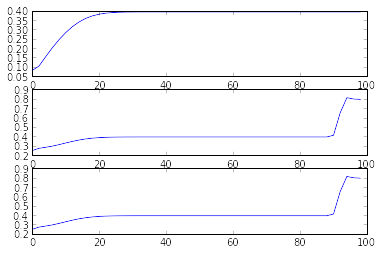

0.0125657075035


In [4]:
qi = [n1.q(i) for i in range(n1.Nedges)]
hi = [n1.getHofA(i) for i in range(3)]
fig,ax = plt.subplots(nrows = n1.Nedges)
for k in range(n1.Nedges):
    x = np.arange(0,n1.Ls[k], n1.Ls[k]/n1.Ns[k])
    ax[k].plot(x,qi[k][0:n1.Ns[k]],'b')
plt.show()
print n1.getAveGradH(390)

In [5]:
ndof = 16
wn = np.array([1,2])
x0 = 0*np.ones(ndof*len(wn))
for i in range(ndof*len(wn)/2):
    x0[2*i+1] = 0
opt1 = PyBC_opt_dh(fi, fc, ndof, x0, 0, wn)
opt1.compute_f()
f0 = opt1.f
print "f is %f" %opt1.f
print "T is %f" %opt1.T
print "Using %s modes" %opt1.modetype

f is 0.000055
T is 3.000000
Using Hermite modes


In [ ]:
opt1.solve()
#opt1.x
#opt1.r


In [7]:
#opt1.x

In [ ]:
#import matplotlib.pyplot as plt
ff = opt1.f
Q1 = opt1.getBCtimeseries(0)
Q2 = opt1.getBCtimeseries(1)
print "Final f/Initial f  = %f"%(ff/0.000004)
t = np.linspace(0,opt1.T, opt1.M+1)
plot(t,Q1,t,np.zeros(opt1.M+1),'r')
xlabel('t')
ylabel('Q1(t)')



In [ ]:
plot(t,Q2,t,np.zeros(opt1.M+1),'r')
xlabel('t')
ylabel('Q2(t)')
#print opt1.x